# Import modules

In [1]:
import pandas as pd
import numpy as np

# our modules
import sys
sys.path.insert(0, '..')

# used defined
from clean import clean_data
from imbalance import balance_data
from evaluate import evaluate_model
from utilities import save_model

# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# estimator
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import ExtraTreesClassifier

# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, roc_auc_score, r2_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.precision", 6)
pd.set_option("display.float_format", lambda x: "%.6f" % x)

In [3]:
RANDOM_STATE = 123

# Load data

In [4]:
data = pd.read_csv('/home/hristo/Documents/WBS_Data_Science/WBS_Predictive_Maintenance/data/ai4i2020.csv', index_col='UDI')

In [5]:
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.100000,308.600000,1551,42.800000,0,0,0,0,0,0,0
2,L47181,L,298.200000,308.700000,1408,46.300000,3,0,0,0,0,0,0
3,L47182,L,298.100000,308.500000,1498,49.400000,5,0,0,0,0,0,0
4,L47183,L,298.200000,308.600000,1433,39.500000,7,0,0,0,0,0,0
5,L47184,L,298.200000,308.700000,1408,40.000000,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.800000,308.400000,1604,29.500000,14,0,0,0,0,0,0
9997,H39410,H,298.900000,308.400000,1632,31.800000,17,0,0,0,0,0,0
9998,M24857,M,299.000000,308.600000,1645,33.400000,22,0,0,0,0,0,0


# Clean data

In [6]:
data_cl = clean_data(data, drop_type=True, multi=True)
data_cl

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,
1,298.100000,308.600000,1551,42.800000,0,0,0,0,0,0
2,298.200000,308.700000,1408,46.300000,3,0,0,0,0,0
3,298.100000,308.500000,1498,49.400000,5,0,0,0,0,0
4,298.200000,308.600000,1433,39.500000,7,0,0,0,0,0
5,298.200000,308.700000,1408,40.000000,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9996,298.800000,308.400000,1604,29.500000,14,0,0,0,0,0
9997,298.900000,308.400000,1632,31.800000,17,0,0,0,0,0
9998,299.000000,308.600000,1645,33.400000,22,0,0,0,0,0


# Prepare data

In [7]:
X = data_cl.copy()
y = X[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].copy()
X.drop(columns=['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], inplace=True)

In [8]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
UDI,,,,,
1,298.100000,308.600000,1551,42.800000,0
2,298.200000,308.700000,1408,46.300000,3
3,298.100000,308.500000,1498,49.400000,5
4,298.200000,308.600000,1433,39.500000,7
5,298.200000,308.700000,1408,40.000000,9
...,...,...,...,...,...
9996,298.800000,308.400000,1604,29.500000,14
9997,298.900000,308.400000,1632,31.800000,17
9998,299.000000,308.600000,1645,33.400000,22


# Split train and test

In [9]:
balance = True
if balance:
    Xc = X.copy()
    yc = y.copy()

    # y_c_1 = yc.copy()
    # y_c_1 = y_c_1.loc[~(y_c_1 == 0).all(axis=1)]
    # # print(y_c_1)
    # y_c_1.value_counts().plot(kind='bar')
    # plt.show()

    data_bal, method = balance_data(Xc, yc, RANDOM_STATE, 'MLSMOTE')
    X_bl, y_bl = data_bal

    X_bl = pd.DataFrame(X_bl, columns=X.columns)
    y_bl = pd.DataFrame(y_bl, columns=y.columns)

    # print(X_bl.info())
    # print(y_bl.info())

    # y_bl_1 = y_bl.copy()
    # y_bl_1 = y_bl_1.loc[~(y_bl_1 == 0).all(axis=1)]
    # # print(y_bl_1)
    # y_bl_1.value_counts().plot(kind='bar')
    # plt.show()

    X_train, X_test, y_train, y_test = train_test_split(X_bl, y_bl, train_size=0.8, random_state=RANDOM_STATE)
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_STATE)

In [10]:
# Create bar plots for multilabels before and after balancing

<Axes: xlabel='target', ylabel='count'>

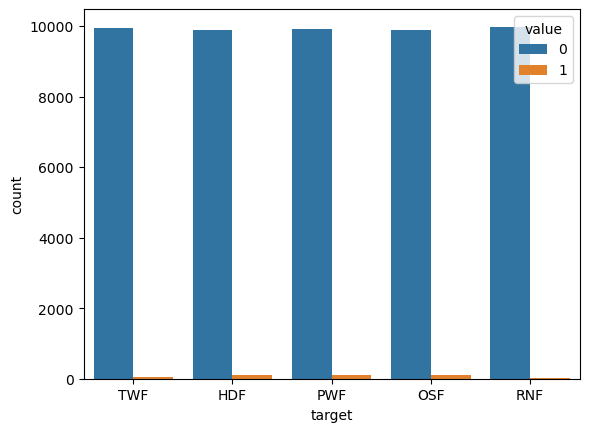

In [11]:
# Mohammed says:
y_melted = y.melt(value_vars=['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], var_name='target', value_name='value')

sns.countplot(x='target', hue='value', data=y_melted)

# Baseline

## Pipeline

In [12]:
params = {}

In [13]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', MultiOutputClassifier(ExtraTreesClassifier()))
])

In [14]:
grid = GridSearchCV(
    pipe,
    param_grid=params,
    scoring='accuracy',
    cv=5,
    verbose=1
)

In [15]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('estimator',
                                        MultiOutputClassifier(estimator=ExtraTreesClassifier()))]),
             param_grid={}, scoring='accuracy', verbose=1)

In [16]:
best_score = grid.best_score_
print(best_score)

0.9730504181269302


In [17]:
best = grid.best_estimator_

In [18]:
best

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 MultiOutputClassifier(estimator=ExtraTreesClassifier()))])

## Evaluation

In [19]:
y_pred = best.predict(X_test)

In [20]:
y_pred.shape

(2013, 5)

In [21]:
y_tp = abs(np.subtract(y_pred, y_test))
# print(y_tp)

In [22]:
results = []
for i in range(y_test.shape[1]):
    accuracy = accuracy_score(y_test.iloc[:, i], y_tp.iloc[:, i])
    results.append(100*accuracy)
    # print(f'{y_test.columns[i]} - {100*accuracy} %')

In [23]:
results

[100.0, 99.40387481371089, 99.15548931942375, 99.4535519125683, 100.0]

In [24]:
metrics = dict()
for i in range(y_test.shape[1]):
    metrics[y_test.columns[i]] = [results[i]]

In [25]:
metrics = pd.DataFrame(metrics, columns=y_test.columns)
metrics

,TWF,HDF,PWF,OSF,RNF
0,100.000000,99.403875,99.155489,99.453552,100.000000


# Save best model

In [26]:
save_model(best, '../../ML_imbalanced_multi.joblib')